# Some examples on Breast Cancer Dataset

In [1]:
# Read the data
import pandas as pd

df = pd.read_csv("breast-cancer-wisconsin_edited.data")
df.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [2]:
#
df.info()

# When look at the csv file, some rows has 'NaN' value on Bare Nuclei column
# We will drop this rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample_code_number             699 non-null int64
Clump_Thickness                699 non-null int64
Uniformity_of_Cell_Size        699 non-null int64
Uniformity_of_Cell_Shape       699 non-null int64
Marginal_Adhesion              699 non-null int64
Single_Epithelial_Cell_Size    699 non-null int64
Bare_Nuclei                    683 non-null float64
Bland_Chromatin                699 non-null int64
Normal_Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


In [3]:
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
Sample_code_number             683 non-null int64
Clump_Thickness                683 non-null int64
Uniformity_of_Cell_Size        683 non-null int64
Uniformity_of_Cell_Shape       683 non-null int64
Marginal_Adhesion              683 non-null int64
Single_Epithelial_Cell_Size    683 non-null int64
Bare_Nuclei                    683 non-null float64
Bland_Chromatin                683 non-null int64
Normal_Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: float64(1), int64(10)
memory usage: 64.0 KB


In [4]:
# Split data frame features and target
del df['Sample_code_number'] # We don't need it

X = df.iloc[:, 0:9].values # Features
y = df.iloc[:, -1].values # Target

In [5]:
# We will import classifiers
# We will classify with a lot of classifiers and then look their score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = [('KNN', KNeighborsClassifier()),
          ('SVM', SVC()),
          ('GaussNB', GaussianNB()),
          ('DecisionTree', DecisionTreeClassifier()),
          ('RandomForest', RandomForestClassifier())]

In [6]:
# Evaluate each model with K-fold cross validation
results = []

for name, model in models:
    kfoldcv = KFold(n_splits=10)
    result = cross_val_score(model, X, y, cv=kfoldcv, scoring='accuracy')
    results.append((name, result.mean(),  result.std() * 2))
    print("Model: " , name)
    print("Average cross-validation score: {:.2f}".format(result.mean()))

Model:  KNN
Average cross-validation score: 0.97
Model:  SVM
Average cross-validation score: 0.95
Model:  GaussNB
Average cross-validation score: 0.96
Model:  DecisionTree
Average cross-validation score: 0.93
Model:  RandomForest
Average cross-validation score: 0.95


In [7]:
# Model boosting with KNearestNeighbors
n_neighbors = [1, 3, 5, 7] # Run model for different neighbor numbers

best_score = 0

for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    kfoldcv = KFold(n_splits=10)
    scores = cross_val_score(knn, X, y, cv=kfoldcv)
    score = scores.mean()
    if score > best_score:
        best_score = score
        best_parameters = {'n_neighbors': n}

print(best_score, best_parameters)

0.969330775789 {'n_neighbors': 7}


In [8]:
# Fit data for best parameters
knn = KNeighborsClassifier(n_neighbors=7)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

knn.fit(X_train, y_train)

# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, knn.predict(X_test))

array([[106,   3],
       [  0,  62]])

In [9]:
# Model boosting with SVM
from sklearn.model_selection import GridSearchCV
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma' : [0.001, 0.01, 0.1, 1, 10, 100],
              'C'     : [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid, cv=10)

X_train, X_test, y_train, y_test = train_test_split(X, y)

grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.98


In [10]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [11]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)

In [12]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_)) # We've captured %76 of the variance in our data in two dimensions.

[ 0.69050756  0.07195066]
0.762458228592


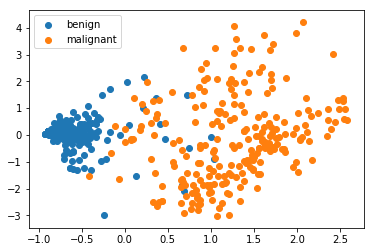

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

target_ids = [2,4]
target_names = ["benign", "malignant"]
plt.figure()
for i, label in zip(target_ids, target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=label)
plt.legend()
plt.show()

In [16]:
# Automated machine learning with tpot
from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Optimization Progress:  33%|███▎      | 100/300 [00:27<00:37,  5.27pipeline/s]

Generation 1 - Current best internal CV score: 0.972625166571483


Optimization Progress:  50%|█████     | 150/300 [01:13<01:49,  1.37pipeline/s]

Generation 2 - Current best internal CV score: 0.972625166571483


Optimization Progress:  67%|██████▋   | 200/300 [01:53<00:26,  3.80pipeline/s]

Generation 3 - Current best internal CV score: 0.972625166571483


Optimization Progress:  83%|████████▎ | 250/300 [02:46<00:40,  1.22pipeline/s]

Generation 4 - Current best internal CV score: 0.9745859508852085


Generation 5 - Current best internal CV score: 0.9745859508852085

Best pipeline: RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=DEFAULT, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.15, RandomForestClassifier__min_samples_leaf=DEFAULT, RandomForestClassifier__min_samples_split=9, RandomForestClassifier__n_estimators=100)
0.982456140351


In [18]:
tpot.export('breast-cancer-wisconsin-pipeline.py')